In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [4]:
solo_living = pd.read_csv('../scratchpad/wards_household_data.csv')

In [5]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [6]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [7]:
len(solo_living)

8570

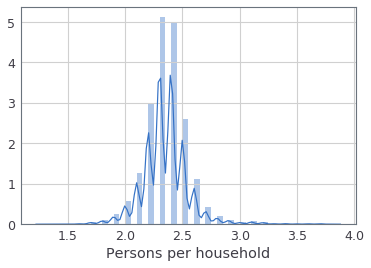

In [8]:
sns.distplot(solo_living['Persons per household'])

In [9]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [10]:
data = pd.read_csv('All_data_aggregated_ward_level.csv')

In [11]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidis

In [17]:
df = pd.read_csv('../scratchpad/Jan_clubcard2nutrients.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [82]:
thresh_bottom_weight = np.mean(df['quantity']) - 2*np.std(df['quantity'])
thresh_top_weight = np.mean(df['quantity']) + 2*np.std(df['quantity'])

In [114]:
test = df[ (df['weight'] < 600) &  (df['weight'] > 100) ]
# test = df[ (df['quantity'] < thresh_top_weight) & (df['quantity'] > thresh_bottom_weight) ]

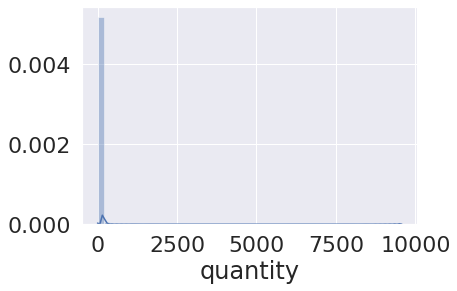

In [115]:
sns.distplot(test['quantity'])

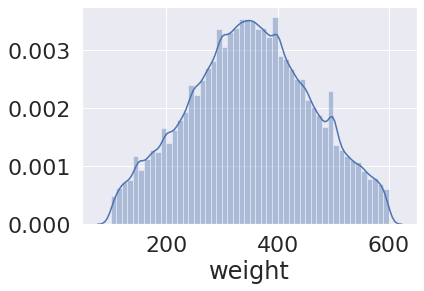

In [116]:
sns.distplot(test['weight'])

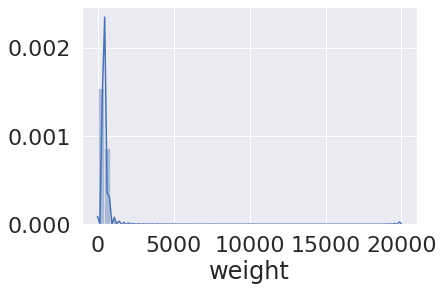

In [216]:
sns.distplot(df['weight'])

In [118]:
# Tesco = test[['clubcard_number','h_nutrients_calories_norm', 'weight' , 'volume','osward','f_energy_alcohol' , 'h_items_norm' , 'h_items_weight_norm']].copy()
# Tesco = Tesco.dropna()
# features_to_normalize = ['h_nutrients_calories_norm', 'weight','f_energy_alcohol','h_items_norm','h_items_weight_norm']
# Tesco[features_to_normalize] = Tesco[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [119]:
list(df.columns)

['pcd',
 'lat',
 'long',
 'oa11',
 'lsoa11',
 'msoa11',
 'osward',
 'oslaua',
 'clubcard_number',
 'weight',
 'volume',
 'energy_on_label',
 'g_fat',
 'g_saturate',
 'g_salt',
 'g_sugar',
 'g_protein',
 'g_carb',
 'g_fibre',
 'g_alcohol',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'f_energy_fat',
 'f_energy_saturate',
 'f_energy_sugar',
 'f_energy_protein',
 'f_energy_carb',
 'f_energy_fibre',
 'f_energy_alcohol',
 'hdi_fat',
 'hdi_saturate',
 'hdi_carb',
 'hdi_protein',
 'hdi_sugar',
 'energy_density',
 'h_nutrients_weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories',
 'h_nutrients_calories_norm',
 'beer_items',
 'dairy_items',
 'eggs_items',
 'fats_oils_items',
 'fish_items',
 'fruit_veg_items',
 'grains_items',
 'meat_red_items',
 'poultry_items',
 'readymade_items',
 'sauces_items',
 'soft_drinks_items',
 'spirits_items',
 'sweets_items',
 'tea_coffee_items',
 'water_items',
 'w

In [120]:
df.clubcard_number.nunique()

886984

In [121]:
card_shopping_dist = df.groupby('clubcard_number').apply(lambda x: len(x))

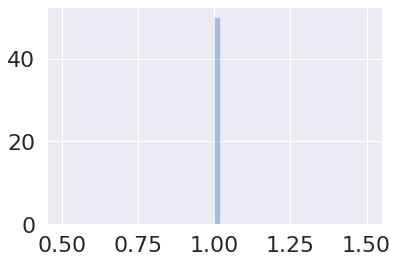

In [122]:
sns.distplot(card_shopping_dist)

In [217]:
household_individual = {'CardID':[] , 'WardCode': []  , 'h_nutrients_calories_norm' :[] , 'weight' : [] , 'volume':[]}
for name, group in test.groupby('clubcard_number'):
    household_individual['CardID'].append(name)
    household_individual['WardCode'].append(group.iloc[0]['osward'])
    household_individual['h_nutrients_calories_norm'].append(np.sum(group['h_nutrients_calories_norm']))
    household_individual['weight'].append(np.sum(group['weight']))
    household_individual['volume'].append(np.sum(group['volume']))


In [218]:
Tesco = pd.DataFrame.from_dict(household_individual)

In [219]:
# Tesco.to_csv('scratchpad/tesco_grouped_individual.csv')

In [220]:
features_to_normalize = ['h_nutrients_calories_norm', 'weight','volume']
Tesco[features_to_normalize] = Tesco[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [239]:
Tesco['Household'] =  0.7321  + 0.2529*Tesco['weight'] - 0.7391*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  0.7344 - 0.4772*Tesco['f_energy_alcohol'] + 0.4570*Tesco['h_items_norm'] -0.6621*Tesco['h_items_weight_norm']

In [240]:
thresh_bottom_household = np.mean(Tesco['Household']) - 2*np.std(Tesco['Household'])
thresh_top_household = np.mean(Tesco['Household']) + 2*np.std(Tesco['Household'])

Tesco_filtered = Tesco[ (Tesco['Household'] > thresh_bottom_household) &  (Tesco['Household'] < thresh_top_household) ].copy()

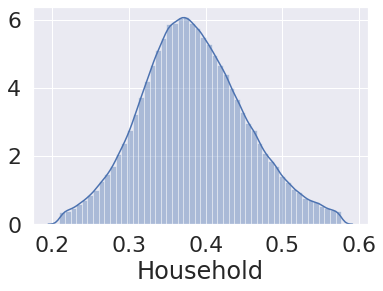

In [241]:
sns.distplot(Tesco_filtered['Household'])

In [242]:
Thresh  = np.min(Tesco_filtered['Household'])+  0.1 * (np.max(Tesco_filtered['Household'])-np.min(Tesco_filtered['Household']))
print(Thresh)

0.24590535730714483


In [243]:
def solo(x):
    if x<= Thresh:
        return 1
    else:
        return 0 
Tesco_filtered['solo'] = Tesco_filtered['Household'].apply(lambda x: solo(x))

In [244]:
np.sum(Tesco_filtered['solo'])

13365

In [245]:
Ward_level_estimate = {'WardCode':[] , 'Household':[]}
for name , group in Tesco_filtered.groupby('WardCode'):
    Ward_level_estimate['WardCode'].append(name)
#     soloHouses = np.sum(group['solo'])
#     fraction = float(soloHouses)/ len(group)
    fraction = np.mean(group['Household'])
    Ward_level_estimate['Household'].append(fraction)
Ward_estimates = pd.DataFrame.from_dict(Ward_level_estimate)

In [246]:
len(Ward_estimates)

658

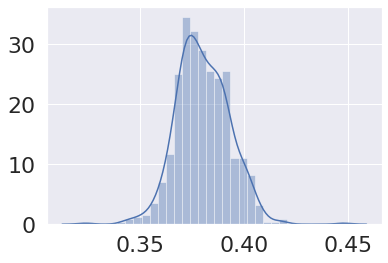

In [247]:
sns.distplot(Ward_level_estimate['Household'])

In [248]:
# %store Ward_estimates

In [249]:
solo_gt = solo_living[['Ward code','Persons per household']]

In [250]:
len(solo_gt)

8570

In [251]:
merged = pd.merge(solo_gt , Ward_estimates, left_on='Ward code', right_on='WardCode')

In [252]:
merged

,Ward code,Persons per household,WardCode,Household
0,E05000128,2.1,E05000128,0.362956
1,E05000129,1.8,E05000129,0.368693
2,E05000130,2.1,E05000130,0.373459
3,E05000131,2.2,E05000131,0.363298
4,E05000132,2.2,E05000132,0.369155
...,...,...,...,...
479,E05000606,2.8,E05000606,0.391063
480,E05000607,2.6,E05000607,0.390853
481,E05000608,2.7,E05000608,0.377931
482,E05000609,2.5,E05000609,0.390819


In [253]:
# features_to_normalize = ['Persons per household']
# merged[features_to_normalize] = merged[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [254]:
pearsonr(merged['Household'],merged['Persons per household'])

(0.6191861936617062, 1.4428549351083482e-52)

In [255]:
def corr(val1 , val2):
    corr = pearsonr(val1,val2)
    

/work/sagarj/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


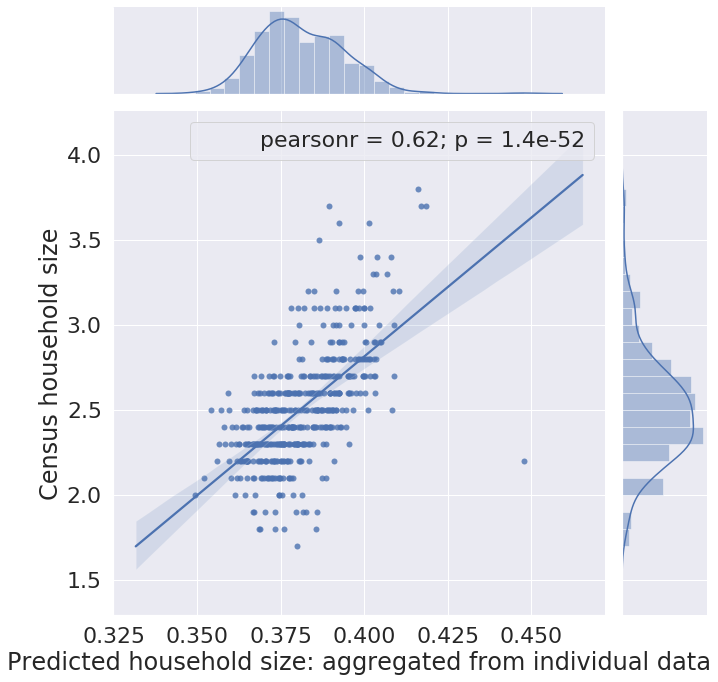

In [256]:
sns.set(font_scale=2) 
ax = sns.jointplot(x=merged['Household'], y=merged['Persons per household'], kind='regression',height=10);
plt.xlabel('Predicted household size: aggregated from individual data')
plt.ylabel('Census household size')
ax.annotate(pearsonr)